### Capstone3 Loan Default Classification 

The finance sector is focused around one essential mathematical problem – how can we assess and quantify risk? While this is usually calculated by large firms, in recent years more and more opportunities have arisen for individuals to not only buy but also sell financial products. LendingClub, a financial services company headquartered in San Francisco, California, enables borrowers to create unsecured personal loans between $1,000 and $40,000 and investors to search and browse the loan listing on LendingClub website. This puts normal people in the same position as banks, allowing them to select loans that they want to invest in based on the information supplied about the borrower, amount of loan, loan grade, and loan purpose. 


But with individuals acting as banks, they then have the same problem as banks do – how can they accurately assess the risk of giving a loan to maximize their return? With Machine Learning, I aim to help answer this question by building a model that can evaluate and learn from previous loans to help recommend the best loans for individuals to invest in. 
Data link: https://www.kaggle.com/datasets/adarshsng/lending-club-loan-data-csv




### Import Libraries

In [1]:
import numpy as np
import scipy as sp
import pandas as pd

# plotting and visualization
import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import seaborn as sns

# modeling
from sklearn.preprocessing import OneHotEncoder as OHE
import sklearn.model_selection
from sklearn.model_selection import train_test_split,cross_validate,KFold, GridSearchCV,cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, roc_curve, auc,precision_score, recall_score,f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import tree, metrics
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.inspection import permutation_importance

import warnings
  
# Settings the warnings to be ignored
warnings.filterwarnings('ignore')
# This warning won't display due to the disabled warnings
warnings.warn('Error: A warning just appeared')

# Data Wrangling


In [2]:
import pandas as pd
df=pd.read_csv("/kaggle/input/lendingdata/XYZCorp_LendingData.txt", delimiter="\t")
print(df.shape)
df.head()


(855969, 73)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [3]:
# drop non-important features
cols=["loan_amnt","funded_amnt","id","member_id","emp_title","issue_d","desc","title","zip_code","earliest_cr_line","mths_since_last_delinq",
      "mths_since_last_record","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","last_credit_pull_d","mths_since_last_major_derog",
      "verification_status_joint","acc_now_delinq","tot_coll_amt","tot_cur_bal","open_acc_6m","open_il_6m","open_il_12m","open_il_24m",
      "mths_since_rcnt_il","total_bal_il","il_util","open_rv_12m","open_rv_24m","max_bal_bc","all_util","total_rev_hi_lim","inq_fi","total_cu_tl",
      "inq_last_12m","annual_inc_joint","dti_joint","addr_state","policy_code",'sub_grade','total_pymnt','out_prncp','out_prncp_inv','application_type',
      "delinq_2yrs","pub_rec","total_rec_late_fee","collections_12_mths_ex_med",'term','installment','initial_list_status',
      'verification_status']
df=df.drop(columns=cols)
df.head()

,funded_amnt_inv,int_rate,grade,emp_length,home_ownership,annual_inc,pymnt_plan,purpose,dti,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,total_pymnt_inv,total_rec_prncp,total_rec_int,recoveries,collection_recovery_fee,default_ind
0,4975.0,10.65,B,10+ years,RENT,24000.0,n,credit_card,27.65,1.0,3.0,13648.0,83.7,9.0,5831.78,5000.00,861.07,0.00,0.00,0
1,2500.0,15.27,C,< 1 year,RENT,30000.0,n,car,1.00,5.0,3.0,1687.0,9.4,4.0,1008.71,456.46,435.17,117.08,1.11,1
2,2400.0,15.96,C,10+ years,RENT,12252.0,n,small_business,8.72,2.0,2.0,2956.0,98.5,10.0,3003.65,2400.00,603.65,0.00,0.00,0
3,10000.0,13.49,C,10+ years,RENT,49200.0,n,other,20.00,1.0,10.0,5598.0,21.0,37.0,12226.30,10000.00,2209.33,0.00,0.00,0
4,3000.0,12.69,B,1 year,RENT,80000.0,n,other,17.94,0.0,15.0,27783.0,53.9,38.0,3242.17,2233.10,1009.07,0.00,0.00,0


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
funded_amnt_inv,855969.0,14700.061226,8425.805478,0.00,8000.00,13000.00,20000.00,35000.00
int_rate,855969.0,13.192320,4.368365,5.32,9.99,12.99,15.99,28.99
annual_inc,855969.0,75071.185963,64264.469813,0.00,45000.00,65000.00,90000.00,9500000.00
dti,855969.0,18.122165,17.423629,0.00,11.88,17.61,23.90,9999.00
inq_last_6mths,855969.0,0.680915,0.964033,0.00,0.00,0.00,1.00,8.00
open_acc,855969.0,11.542447,5.308094,0.00,8.00,11.00,14.00,90.00
revol_bal,855969.0,16910.526992,22223.741577,0.00,6469.00,11903.00,20857.00,2904836.00
revol_util,855523.0,55.019405,23.811585,0.00,37.60,55.90,73.50,892.30
total_acc,855969.0,25.269269,11.818841,2.00,17.00,24.00,32.00,169.00
total_pymnt_inv,855969.0,7622.220520,7885.156400,0.00,1960.12,4948.25,10697.33,57777.58


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   funded_amnt_inv          855969 non-null  float64
 1   int_rate                 855969 non-null  float64
 2   grade                    855969 non-null  object 
 3   emp_length               812908 non-null  object 
 4   home_ownership           855969 non-null  object 
 5   annual_inc               855969 non-null  float64
 6   pymnt_plan               855969 non-null  object 
 7   purpose                  855969 non-null  object 
 8   dti                      855969 non-null  float64
 9   inq_last_6mths           855969 non-null  float64
 10  open_acc                 855969 non-null  float64
 11  revol_bal                855969 non-null  float64
 12  revol_util               855523 non-null  float64
 13  total_acc                855969 non-null  float64
 14  tota

In [6]:
# missing data
df.isnull().sum()

funded_amnt_inv                0
int_rate                       0
grade                          0
emp_length                 43061
home_ownership                 0
annual_inc                     0
pymnt_plan                     0
purpose                        0
dti                            0
inq_last_6mths                 0
open_acc                       0
revol_bal                      0
revol_util                   446
total_acc                      0
total_pymnt_inv                0
total_rec_prncp                0
total_rec_int                  0
recoveries                     0
collection_recovery_fee        0
default_ind                    0
dtype: int64

## Categorical Features

In [7]:
# list categorical features
c_df=df.select_dtypes("object")
c_df.head()

,grade,emp_length,home_ownership,pymnt_plan,purpose
0,B,10+ years,RENT,n,credit_card
1,C,< 1 year,RENT,n,car
2,C,10+ years,RENT,n,small_business
3,C,10+ years,RENT,n,other
4,B,1 year,RENT,n,other


In [8]:
# count values of categorical features to see if there is any special values?
for x in c_df.columns:
    print("\n",c_df[x].value_counts())
    


 grade
B    247998
C    236855
A    145665
D    132802
E     66448
F     21328
G      4873
Name: count, dtype: int64

 emp_length
10+ years    282090
2 years       75986
< 1 year      67597
3 years       67392
1 year        54855
5 years       53812
4 years       50643
7 years       43204
8 years       42421
6 years       41446
9 years       33462
Name: count, dtype: int64

 home_ownership
MORTGAGE    429106
RENT        342535
OWN          84136
OTHER          144
NONE            45
ANY              3
Name: count, dtype: int64

 pymnt_plan
n    855964
y         5
Name: count, dtype: int64

 purpose
debt_consolidation    505392
credit_card           200144
home_improvement       49956
other                  40949
major_purchase         16587
small_business          9785
car                     8593
medical                 8193
moving                  5160
vacation                4542
house                   3513
wedding                 2280
renewable_energy         549
educational     

### Convert categorical features to numeric features

In [9]:

# convert employment length to numberic to shorten dataframe for modeling later on 
df.emp_length=df.emp_length.str.replace("< 1 year",'0.5 year')
df.emp_length=df.emp_length.str.replace("10+ years",'10 years')
print(df.emp_length.unique())

df.emp_length=df.emp_length.str.replace("years",'')
df.emp_length=df.emp_length.str.replace('year','')
print(df.emp_length.unique())
df.emp_length=df.emp_length.astype("float")

df.info()


['10 years' '0.5 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]
['10 ' '0.5 ' '1 ' '3 ' '8 ' '9 ' '4 ' '5 ' '6 ' '2 ' '7 ' nan]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   funded_amnt_inv          855969 non-null  float64
 1   int_rate                 855969 non-null  float64
 2   grade                    855969 non-null  object 
 3   emp_length               812908 non-null  float64
 4   home_ownership           855969 non-null  object 
 5   annual_inc               855969 non-null  float64
 6   pymnt_plan               855969 non-null  object 
 7   purpose                  855969 non-null  object 
 8   dti                      855969 non-null  float64
 9   inq_last_6mths           855969 non-null  float64
 10  open_acc                 855969 non-null  

Remove un-wanted texts in employment length column and convert it from object to numeric to avoid creating more dummies before modeling. Basicaly, keep the data frame at a manageble size.

## Numeric Features

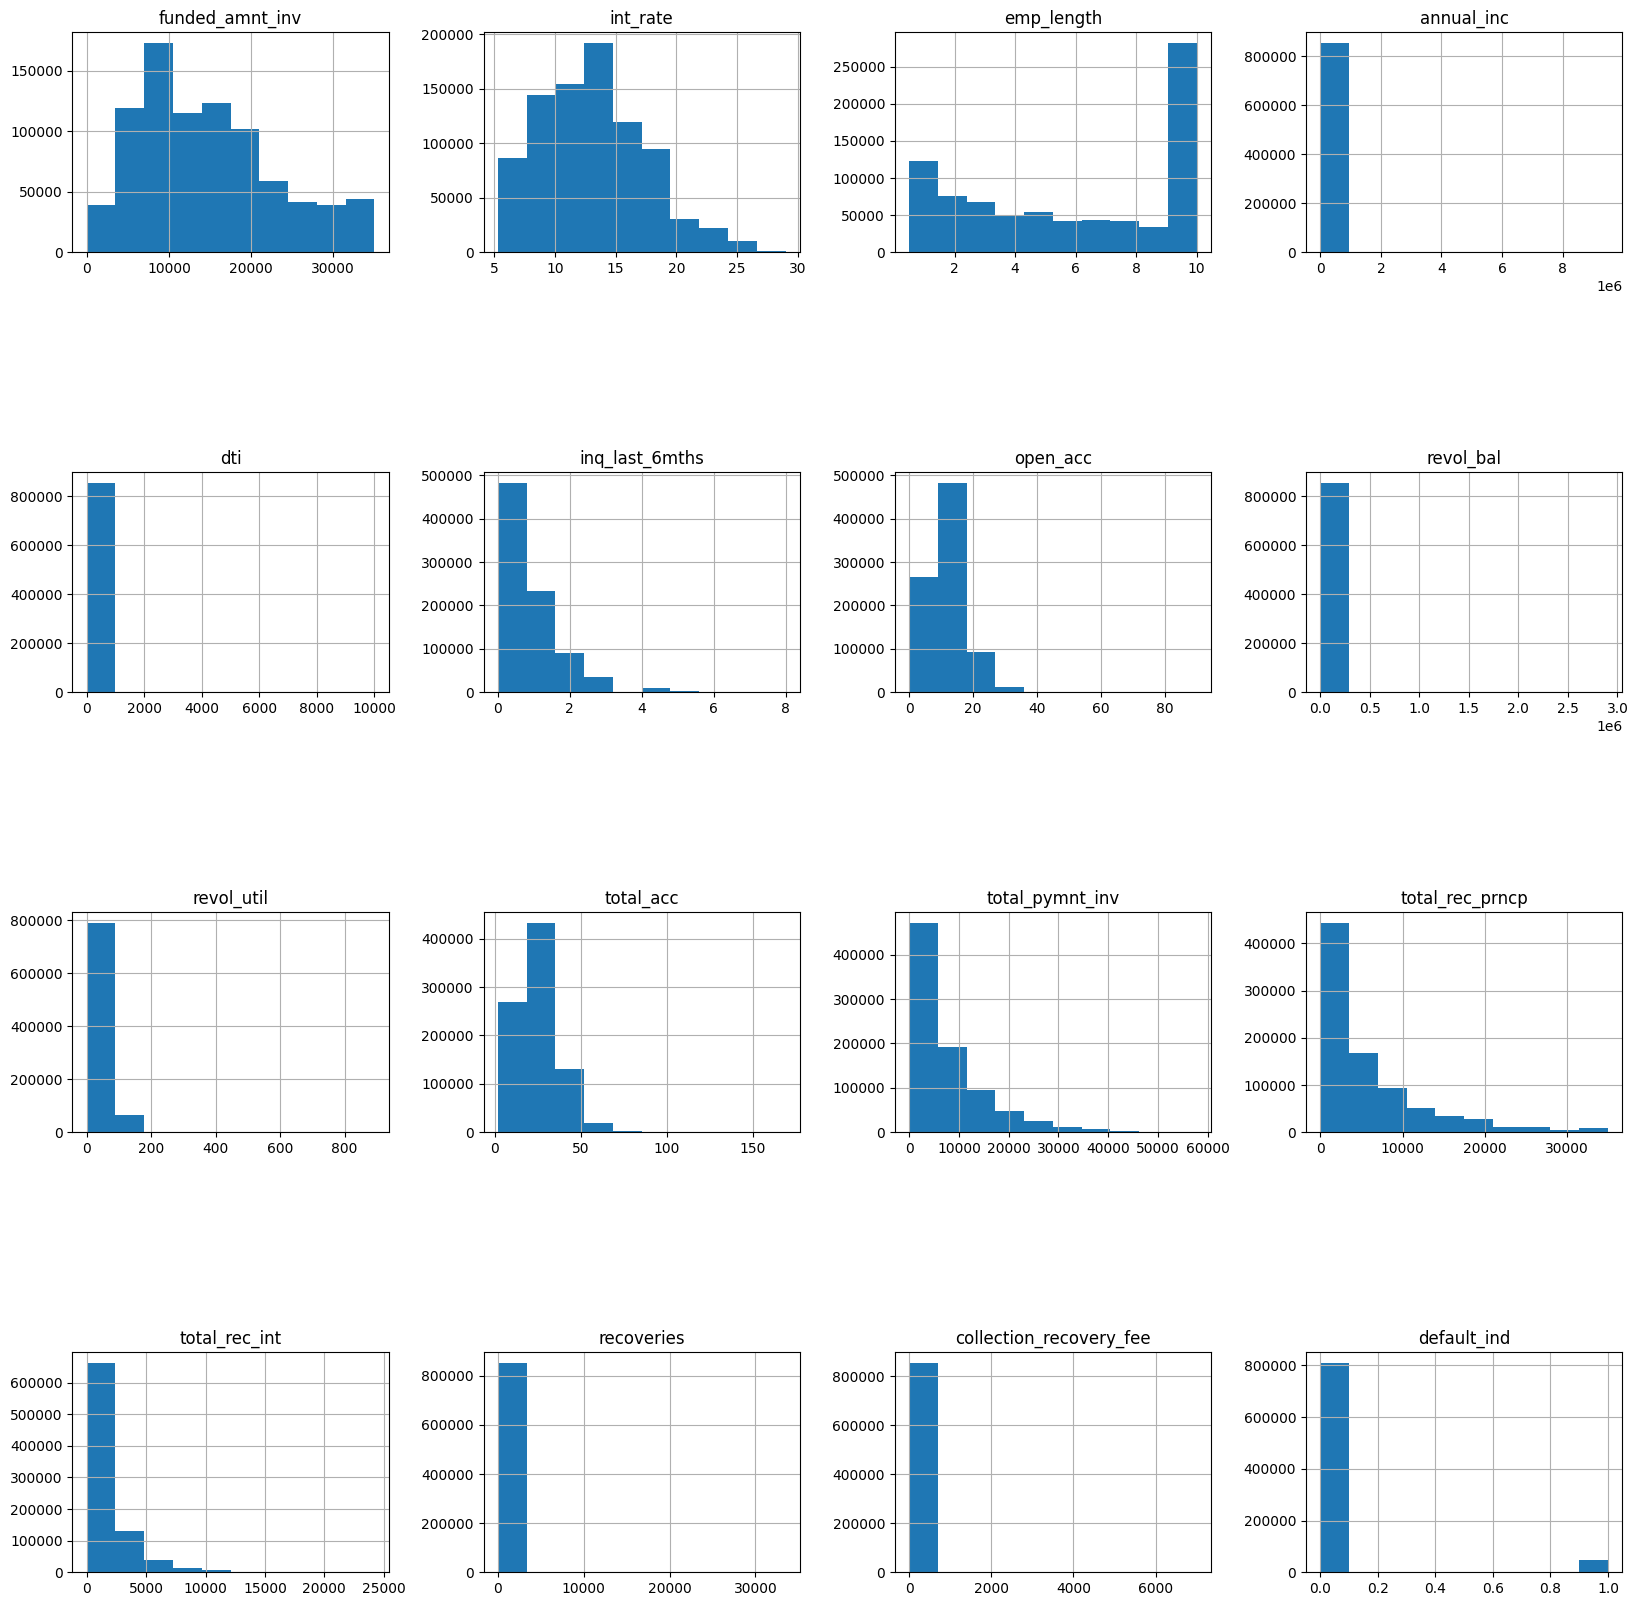

In [10]:
df.hist(figsize=(20,20))
plt.subplots_adjust(hspace=1);

The dataset had 855,969 rows and 73 columns. After carefully reviewing the data, I removed 45 un-meaningful columns to keep the width of the dataset at a manageable size with good information for problem-solving. Next, I removed unwanted texts from the employment-length column and converted it from object to numeric to avoid creating more dummies for modeling. As I wanted to keep as much data as possible for data analysis, I will deal with missing data later. By the end of data wrangling, the total number of columns is 25.

# Exploratory Data Analysis

EDA is the most crucial task in data science. Without understanding the data and their correlation, there is no meaning in training machine learning as good data in good data out. We will uncover any patterns, trends, and correlations between the target variable with independent features and detect outliers or anomalous data to help answer the business questions.  



### Target variable default
First, let's look at the default, a target variable of the problem-solving. Default happens when a borrower stops making required payments on a debt. According to TransUnion, in the first quarter of 2023, 3.91% of personal loan borrowers were late on their loan payments. The default rate of LendingClub is 5.4%, as shown in the pie chart below, a ratio of 20 to 1. Why LendingClub's default rate is so high? Is the platform more advantageous for borrowers with economic difficulties and low credit scores than traditional financial institutions, or are individual investors willing to tolerate the extra risk for higher returns?

Text(0, 0.5, '')

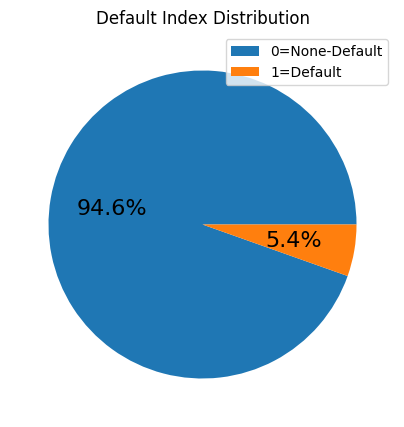

In [11]:
default_count=df.default_ind.value_counts()
default_count.rename(index={0:"0=None-Default",1:"1=Default"},inplace=True)
default_count.plot(kind="pie",legend="True",labels=None,textprops={'fontsize': 16},autopct='%1.1f%%',figsize=(5,5))
plt.title("Default Index Distribution")
plt.ylabel("")


### Default index vs numeric featers

In [12]:
#define a function to create scatterplotf of default against numeric feature

def boxplots (columns,ncol=None, figsize=(4,4)):
    if ncol is None:
        ncol=len(colums)
    sns.set(rc={'figure.figsize':(4,4)})
    for  col in columns:
        sns.catplot(x='default_ind',y=col,data=df,kind='box',sym="")
        plt.show()

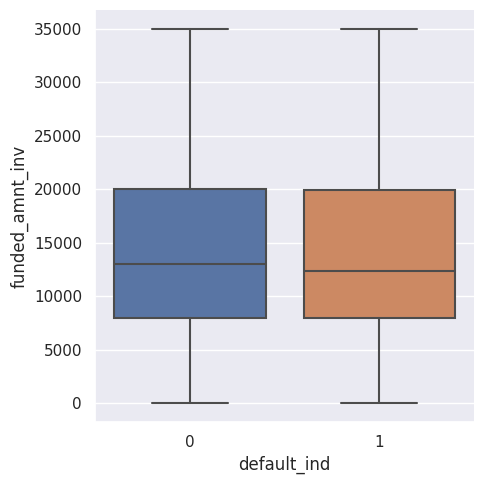

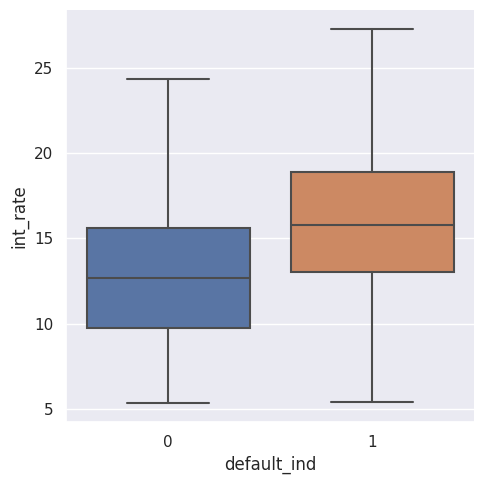

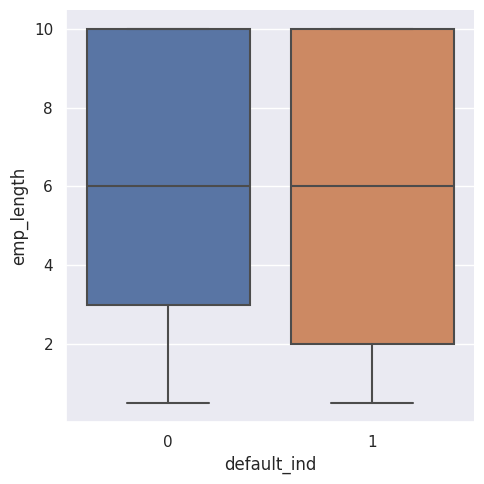

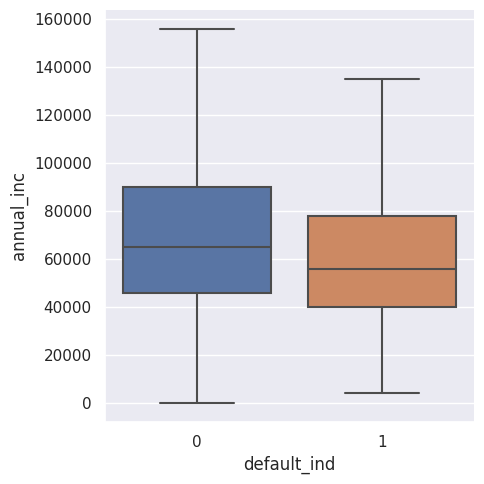

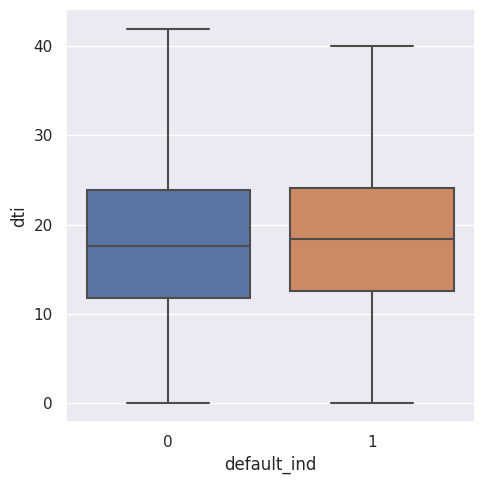

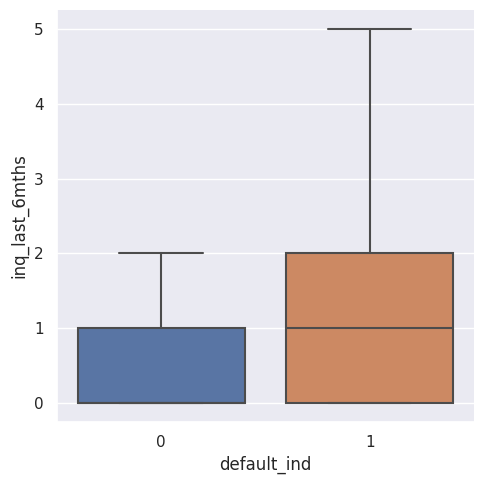

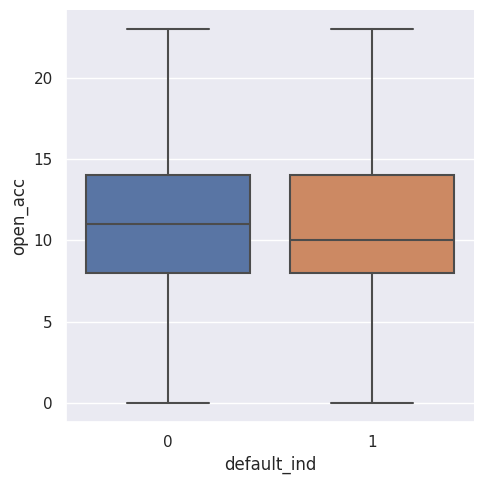

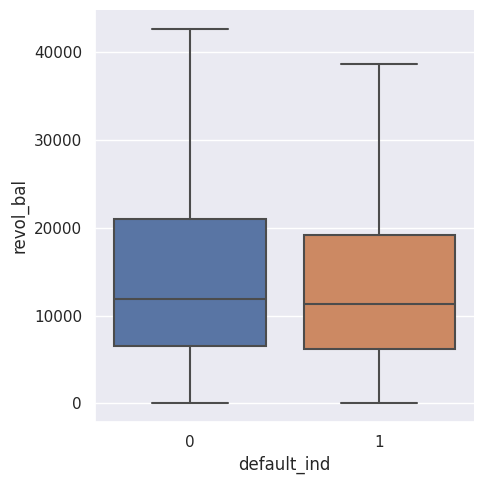

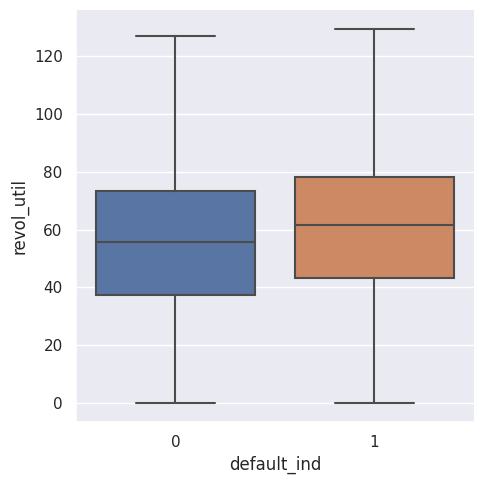

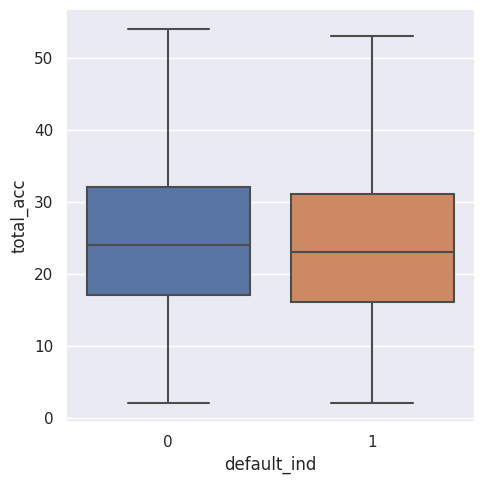

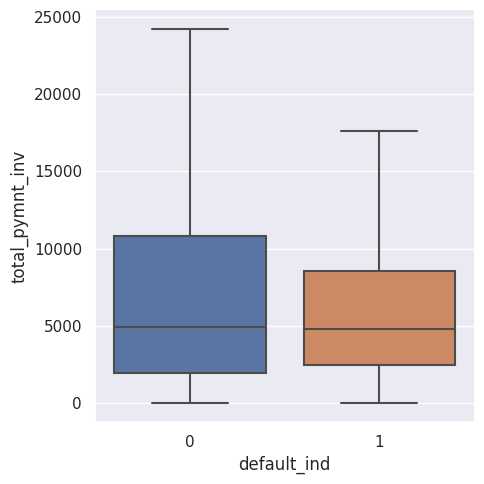

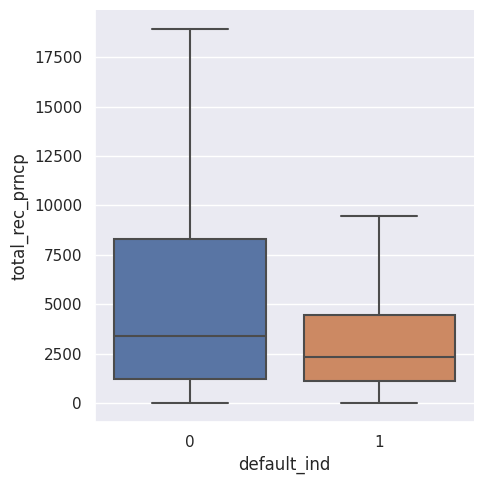

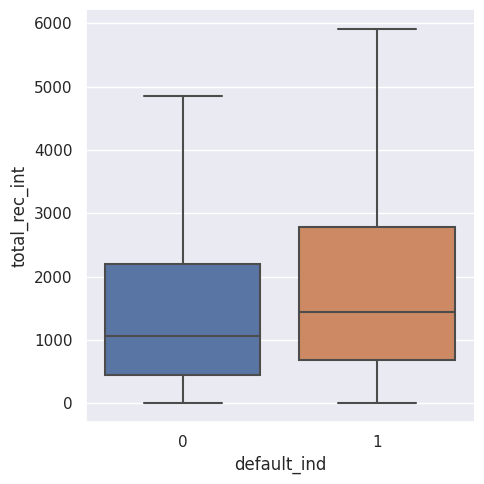

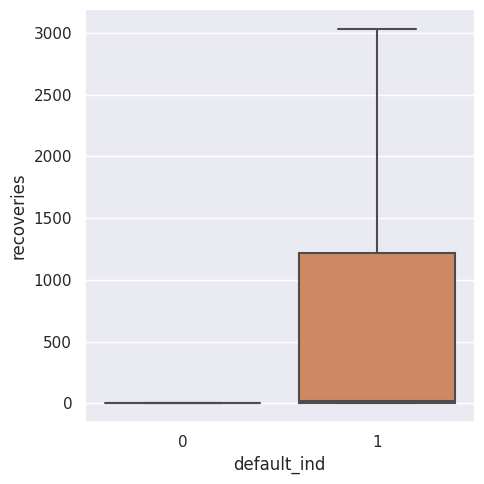

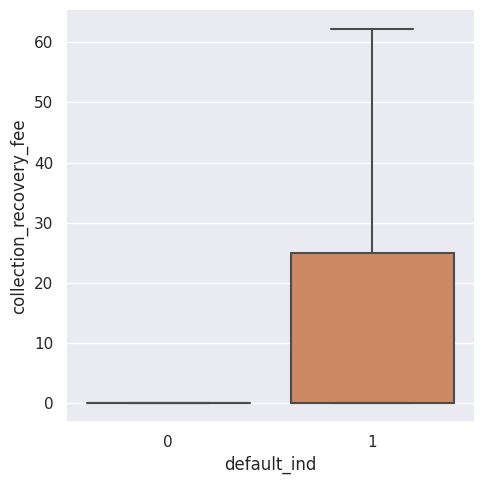

In [13]:
# select numeric features for boxplot and call boxplots
features= df.select_dtypes(include=np.number).columns.tolist()
features.remove("default_ind")
boxplots(features,ncol=3,figsize=(4,4))

Text(0.5, 1.0, 'Recoverries distribution of default_ind=1')

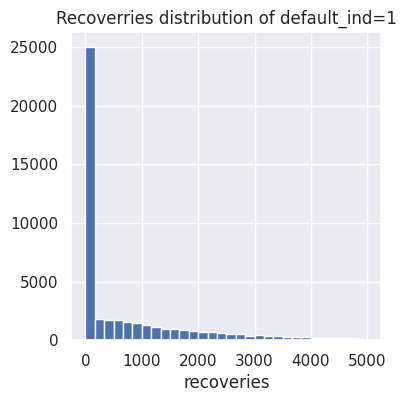

In [14]:
df_1=df[df.default_ind==1]
df_1.recoveries.hist(bins=30,range=(0,5000))
plt.xlabel("recoveries")
#plt.ylabel("default count")
plt.title("Recoverries distribution of default_ind=1")

(0.0, 200000.0)

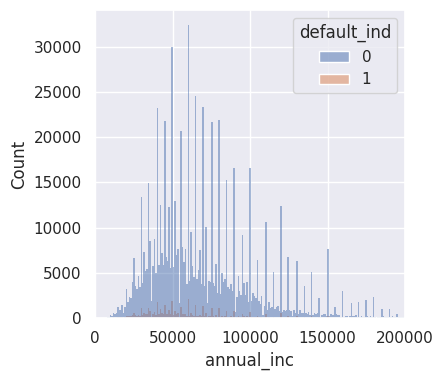

In [15]:
sns.histplot(x='annual_inc',data=df,hue='default_ind')
plt.xlim(0,200000)

## Numeric Feature Heatmap

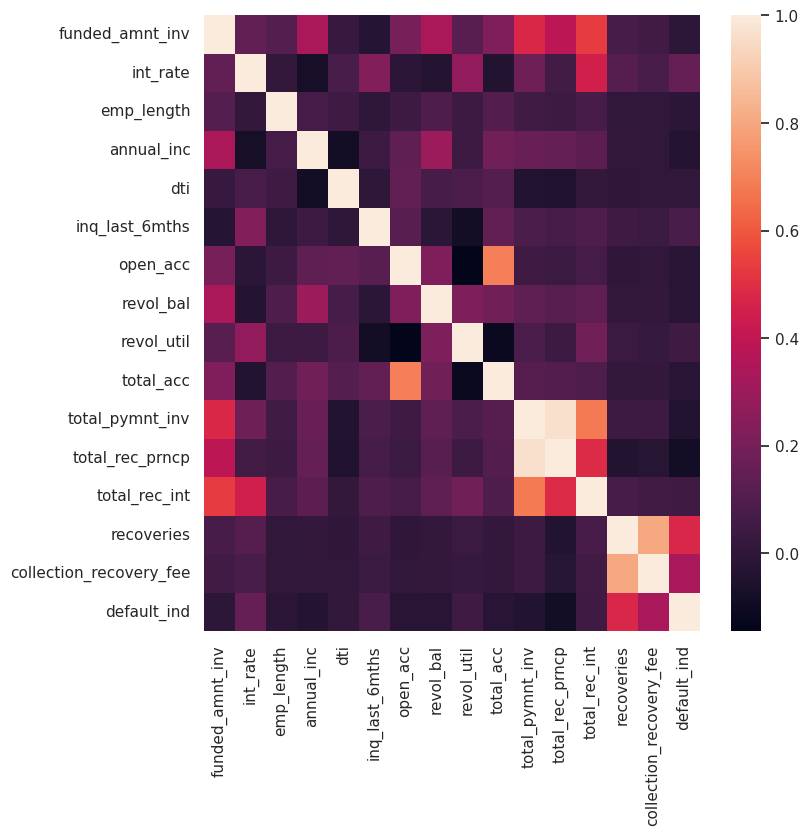

In [16]:
# show  a seaborn heatmap of correlation in numeric data
n_df=df.select_dtypes(include="number")
plt.subplots(figsize=(8,8))
sns.heatmap(n_df.corr());
plt.show()

Default loans seem to have some correlation with recoveries,collection fee, and interest but not much on the annual income.

Interest is the monetary charge for the privilege of borrowing money


Recoveries are “post-charge-off gross recovery” when a company writes off debt as a loss it believes it can no longer collect as the borrower has become delinquent on payments. Charge-offs remain on the credit report for seven years. The borrowers are still responsible for the charge-off. As we can see, no examples of recovery occur in non-default cases. It seems anyone with recovery will default. 


Inquiry is an essential aspect of the entire loan approval process by which lenders evaluate borrowers' credit history and credit score. There are two types of inquiries. The hard inquiry is made for serious purposes only as they leave a record on the borrower's credit report. In contrast, a soft inquiry is made by a borrower who wants to know their credit score or by a lender to offer pre-approved loans that do not affect your credit score. Frequent hard inquiries decrease credit scores as they can be seen as a symptom of financial insecurity of demand for extra credit. There is no way to know if inquiries shown in the data set are hard or soft, but my guess was that they are hard inquiries and showed a strong correlation to the default. The average is one inquiry, but some bad loans had up to 5 inquiries. Thus, it seems there is some relationship between the number of inquiries and the likelihood of defaults.


## How categorical features correlate to the target default

### loan purpose


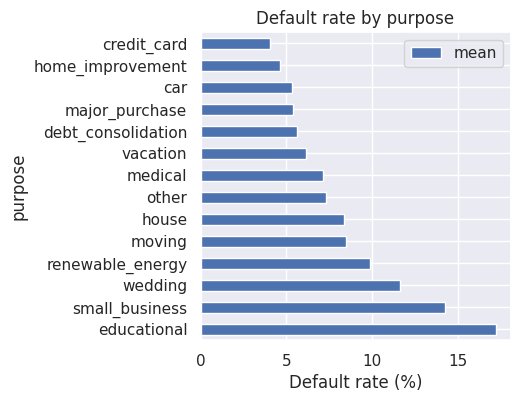

In [17]:
# find correlation between default and loan purpose
df_purpose=df.groupby("purpose")["default_ind"].agg(['mean']).sort_values('mean',ascending=False)
df_purpose['mean']=df_purpose["mean"]*100
#df_purpose.reset_index(inplace=True)

df_purpose.plot(kind='barh',title="Default rate by purpose")
plt.xlabel("Default rate (%)")
plt.show()

Personal loans can be used for various significant purchases and expenses. Surprisingly, educational loans are at the top of the default. Still, the rate matches with the U.S. Department of Education reports that about 20 percent of borrowers default, and more than a million loans default yearly. The second purpose on the list is the small business loan, which is unsurprising as doing business comes with risks. Next is a wedding loan. Weddings are personal events tied to emotion; exceeding your budget is expected. 

### employment length

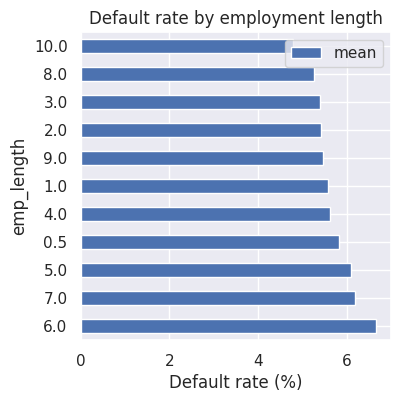

In [18]:
# find correlation between default and employment lenght

df_emp=df.groupby("emp_length")["default_ind"].agg(['mean']).sort_values('mean',ascending=False)
df_emp['mean']=df_emp["mean"]*100
#df_purpose.reset_index(inplace=True)

df_emp.plot(kind='barh',title="Default rate by employment length")
plt.xlabel("Default rate (%)")
plt.show()

Employment length does not show a strong correlation to default

### Homeownership
People who own a house or a property should think twice before defaulting on a loan. Besides damaging their credit, lenders or debt collectors can recover the money they hold by taking them to court, garnishing their wages, and putting a lien on their property. They may also lose their collateral, like the money in savings accounts. Therefore, the default rate is lower for these groups. On the other hand, people do not have property; they have less to lose, so the chance of default is higher.

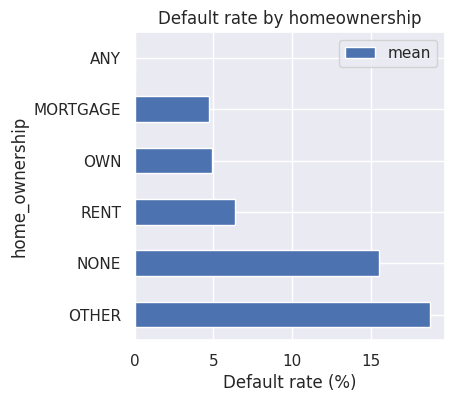

In [19]:
# find correlation between default and home ownership
df_home_ownership=df.groupby("home_ownership")["default_ind"].agg(['mean']).sort_values('mean',ascending=False)
df_home_ownership['mean']=df_home_ownership["mean"]*100
#df_purpose.reset_index(inplace=True)

df_home_ownership.plot(kind='barh',title="Default rate by homeownership")
plt.xlabel("Default rate (%)")
plt.show()

### Loan grade
Loan grade is a quality score to a loan based on a borrower’s credit history, quality of the collateral, and the likelihood of repayment of the principal and interest. Loans grade A are the loans with the lowest expected risk of loss and, therefore, pay the lender the lowest interest. On the other hand, loans grade G pay the highest compensation to the lenders for the highest risk. The box plot below demonstrates the relationship between loan grade and interest. The average interest of grade A is 7% while grade G is 26%, almost a 19% difference between the lowest risk to the highest risk loans. A 30% APR is pretty high for personal loans, but it is what people pay for with their bad credit.  

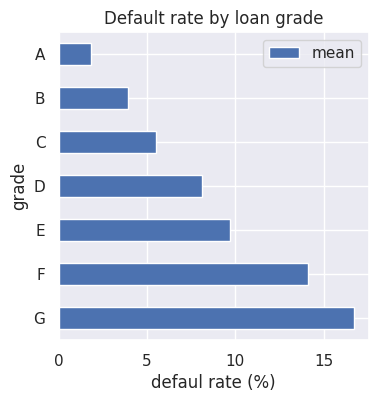

In [20]:
# find correlation between default and loan grade
#ax.set_facecolor("orange")
df_grade=df.groupby("grade")["default_ind"].agg(['mean']).sort_values('mean',ascending=False)
df_grade['mean']=df_grade["mean"]*100
df_grade.plot(kind='barh',title="Default rate by loan grade")
plt.xlabel("defaul rate (%)")
plt.show()

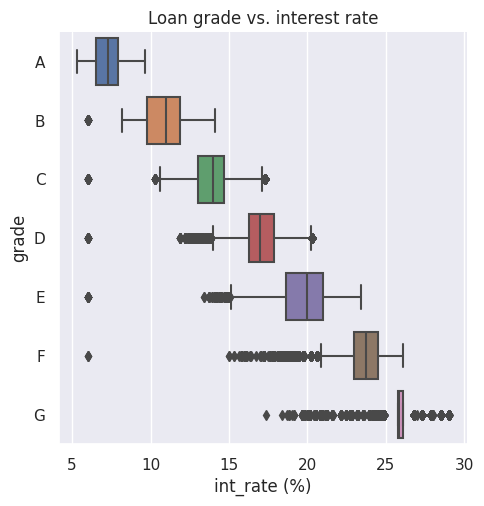

In [21]:
#ax=df.groupby("grade")["int_rate"].agg(['mean']).sort_values('mean',ascending=False).plot(kind='barh',title="Default rate by loan grade")
order=['A','B','C','D','E','F','G']
sns.catplot(x="int_rate",y="grade",data=df, kind='box',order=order)
plt.xlabel("int_rate (%)")
plt.title("Loan grade vs. interest rate")
plt.show()

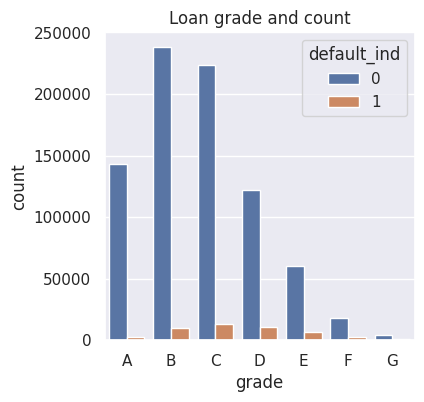

In [22]:
#plt.bar(x=df.grade, y=df.default_ind)
# Calculate profit of default loans for each loan grade
order=['A','B','C','D','E','F','G']
sns.countplot(data=df, x="grade", hue="default_ind", order=order)
plt.title("Loan grade and count")
plt.show()

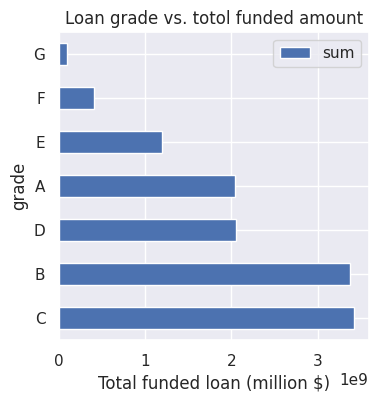

In [23]:
ax=df.groupby("grade")["funded_amnt_inv"].agg(['sum']).sort_values('sum',ascending=False).plot(kind='barh',title="Loan grade vs. totol funded amount")
#sns.catplot(x="funded_amnt_inv",y="grade",data=df, kind='box')
ax.set_xlabel("Total funded loan (million $)")
plt.show()

There is a risk associated with any loan. Even loans grade A have defaults, but the default rate is way less than lower loan grades. The best loan grade A has a 5% default rate, while loan grade G has a 28% default rate. Loan grades have a substantial direct correlation with defaults. Do high-interest rates compensate for the increased risks? No, it does not seem so.


# Feature enigneering

With a good understanding of all the features and their correlation, additional unwanted features like recoveries, collection fee, and total payment were dropped before the data was split into train and test data sets with 25% test size. Categorical features were transformed into numerical ones, which can be used in machine learning models. Remember during data wrangling, many missing values have been left untouched as we wanted to view the distribution from all loans. Those missing values were imputed with median values then standard scaler was applied to X_train and X_test.  

In [24]:
df=df.drop(['recoveries','collection_recovery_fee','total_pymnt_inv','total_rec_prncp','total_rec_int'],axis=1)
# split the data for target and independent variables
X=df.drop(['default_ind'],axis=1)
y=df['default_ind']

### Get dummies and split data into train and test sets

In [25]:
# get dummies for categorical features
X=pd.get_dummies(X)

# prepare a sample size for GridSearch later on 
X['target']=y
X_sample=X.sample(80000)
y_sample=X_sample['target']
X_sample=X_sample.drop(['target'],axis=1)
X=X.drop(['target'],axis=1)

# split data into train and test datasets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
print(X_train.shape)
print(X_test.shape)



(641976, 39)
(213993, 39)


### Impute and scale X_train and X_test

In [26]:
# impute missing data with median
s=SimpleImputer(strategy="median")
X_train = s.fit_transform(X_train)
X_test = s.fit_transform(X_test)
X_sample = s.fit_transform(X_sample)

# scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_sample = scaler.fit_transform(X_sample)


In [27]:
# Invert default target values to work with precision and recall matrics
# 1 is good loan and 0 is bad loan  
y_train = (y_train==0)*1
y_test = (y_test==0)*1
y_sample = (y_sample==0)*1

Text(0, 0.5, '')

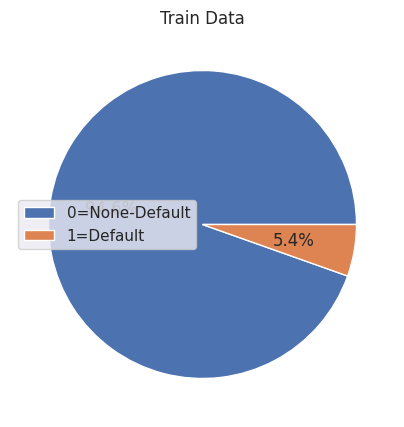

In [28]:
default_ytrain=y_train.value_counts()
default_ytrain.rename(index={0:"Default",1:"Non-Default"},inplace=True)
default_count.plot(kind="pie",legend="True",labels=None,textprops={'fontsize': 12},autopct='%1.1f%%',figsize=(5,5))
plt.title("Train Data")

plt.ylabel("")

Text(0, 0.5, '')

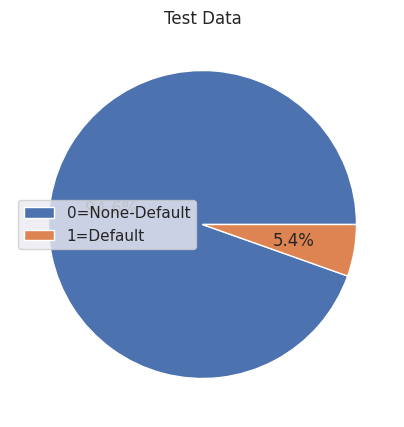

In [29]:
default_ytest=y_test.value_counts()
default_ytest.rename(index={0:"Default",1:"Non-Default"},inplace=True)
default_count.plot(kind="pie",legend="True",labels=None,textprops={'fontsize': 12},autopct='%1.1f%%',figsize=(5,5))
plt.title("Test Data")
plt.ylabel("")

Before moving on to modeling, both y_train and y_test values were inverted, good loans have the value of 1, and bad loans have the value of 0. The reason behind this is we will use precision and recall for model evaluation. Precision measures the accuracy of positive predictions and recall measure the completeness of positive predictions. More about precision and recall will be detailed in the section below.

# Model training 
The data is labeled which means we will be solving a supervised classification problem. After determining the type of machine learning, three models were chosen for training which were Logistic regression (LR), Random forest (RF), and Gradient boosting (GB) to find a best model. For each of the model, GridSearchCV was performed and best estimators were used by the models to find confusion matrix, also known as error matrix, to help us gain insight into how correct our predictions were compared to the actual values. Below is the terminology from a confusion matrix:

•	TP= True Positive (good loan and classified as good loan)

•	TN= True Negative (bad loan and classified as bad loan)

•	FP= False Positive (bad loan and classified as good loan)

•	FN= False Negative (good loan and classified as bad loan)

Precision and Recall:

•	Precision = TP/(TP+FP). It is a measurement of good loans that are correctly identified as good loans. 

•	Recall = TP/(TP+ FN). In simple terms, recall tells us how many good loans are classified as bad loans. 


ROC/AUC:

•	ROC is receiver operating characteristic curve used to  summarize the model’s performance tradeoff with all classification thresholds between true positive rate (TPR) and false positive rate (FPR).  TPR=TP/(TP+FN) and FPR = FP/(FP+TN)

•	AUC is area under the ROC curve which used to measures the entire two-dimensional area underneath the entire ROC curve across all possible classification thresholds



## Logistic Regression Model

In [30]:
# GridSearchCV
lr=LogisticRegression(solver = 'newton-cg')
grid_params ={'C':[.001,.01,.1,1, 10],'max_iter': [50, 100, 150]}
lr_grid_cv=GridSearchCV(lr,param_grid=grid_params,cv=3)
lr_grid_cv.fit(X_sample,y_sample)
print("Best parameters: ",lr_grid_cv.best_params_)
print("Best score: ",lr_grid_cv.best_score_)


Best parameters:  {'C': 0.001, 'max_iter': 50}
Best score:  0.9454625001392087


In [31]:
# apply best parameters to find precision and recall
y_train_predict_lr = lr_grid_cv.best_estimator_.predict(X_train)
y_test_predict_lr = lr_grid_cv.best_estimator_.predict(X_test)
print("\nTrain data")
print(classification_report(y_train,y_train_predict_lr))
print("\n\nTest data")
print(classification_report(y_test,y_test_predict_lr))



Train data
              precision    recall  f1-score   support

           0       1.00      0.00      0.00     34803
           1       0.95      1.00      0.97    607173

    accuracy                           0.95    641976
   macro avg       0.97      0.50      0.49    641976
weighted avg       0.95      0.95      0.92    641976



Test data
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     11664
           1       0.95      1.00      0.97    202329

    accuracy                           0.95    213993
   macro avg       0.47      0.50      0.49    213993
weighted avg       0.89      0.95      0.92    213993



In [32]:

# cross validate with the best estimator to find rpecision, recall, f1 scores
#print(cross_validate(lr_grid_cv.best_estimator_, X_train, y_train, cv=5,scoring=['precision','recall','f1']))

Logistic regression AUC:  0.71


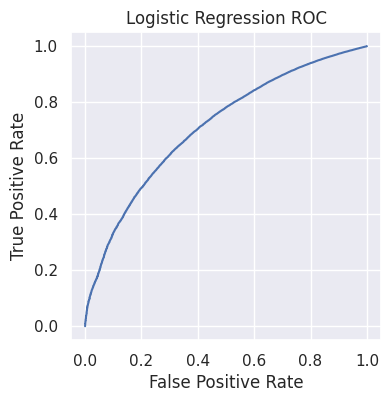

<Figure size 300x300 with 0 Axes>

In [33]:
# find AUC 
y_test_pred_lr_proba=lr_grid_cv.predict_proba(X_test)[::,1]
fpr_lr, tpr_lr,_=metrics.roc_curve(y_test,y_test_pred_lr_proba)
auc_lr=metrics.roc_auc_score(y_test,y_test_pred_lr_proba)
print("Logistic regression AUC: ",round(auc_lr,2))

# plot ROC
plt.plot(fpr_lr,tpr_lr)
plt.ylabel('True Positive Rate')
plt.xlabel("False Positive Rate")
plt.title("Logistic Regression ROC")
plt.figure(figsize=(3,3))
plt.show()


Text(0.5, 1.0, 'Logistic regression feature importances')

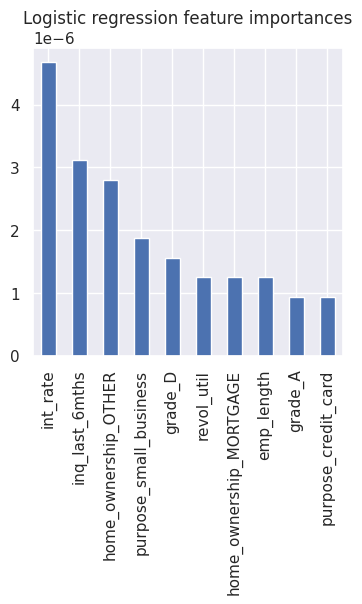

In [34]:
# compute plot feature importances
lr_fi = permutation_importance(lr_grid_cv, X_train, y_train)
lr_fi_df = pd.DataFrame(lr_fi['importances_mean'], index=X.columns,columns=["fi"])
lr_fi_df_sorted=lr_fi_df.fi.sort_values(ascending=False)
lr_fi_df_sorted.head(10).plot(kind='bar')
plt.title("Logistic regression feature importances")


'C': 0.001, 'max_iter': 50 are best estimators and with that Logistic regression model has a perfect score of 1 for recall and 0.95 for precision which are not bad. Surprising to see interest rate is the only feature from feature importances. 

## Random Forest Classifier Model

In [35]:
# parameter tunning
grid_search_params ={'n_estimators':[50,100,200], 'max_depth': [2,5, 10, None]}
rf_grid_cv=GridSearchCV(RandomForestClassifier(), param_grid = grid_search_params, scoring='roc_auc', cv=3)
rf_grid_cv.fit(X_sample,y_sample)
print(rf_grid_cv.best_score_)
print(rf_grid_cv.best_estimator_)

0.7424297950001417
RandomForestClassifier(max_depth=10, n_estimators=200)


In [36]:
# predict train and test data
y_train_predict_rf=rf_grid_cv.best_estimator_.predict(X_train)
y_test_predict_rf=rf_grid_cv.best_estimator_.predict(X_test)
print("\nScores from train data set")
print(classification_report(y_train,y_train_predict_rf))
print("\nScores from test data set")
print(classification_report(y_test,y_test_predict_rf))


Scores from train data set
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     34803
           1       0.95      1.00      0.97    607173

    accuracy                           0.95    641976
   macro avg       0.47      0.50      0.49    641976
weighted avg       0.89      0.95      0.92    641976


Scores from test data set
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     11664
           1       0.95      1.00      0.97    202329

    accuracy                           0.95    213993
   macro avg       0.47      0.50      0.49    213993
weighted avg       0.89      0.95      0.92    213993



Random forest AUC:  0.75


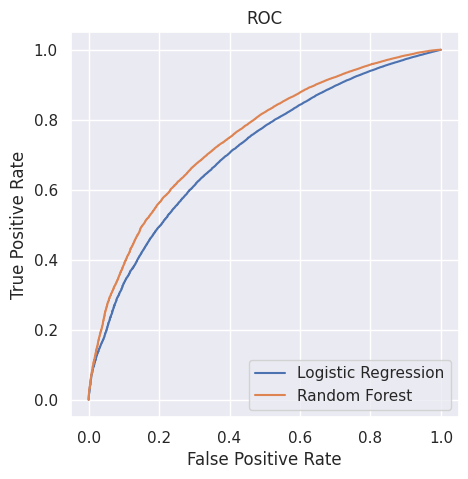

Random forest AUC:  0.75


In [37]:
# find AUC 
y_test_pred_rf_proba=rf_grid_cv.best_estimator_.predict_proba(X_test)[::,1]
fpr_rf, tpr_rf,_=metrics.roc_curve(y_test,y_test_pred_rf_proba)
auc_rf=metrics.roc_auc_score(y_test,y_test_pred_rf_proba)
print("Random forest AUC: ",round(auc_rf,2))

#create ROC curve
f,(ax1)=plt.subplots(1,sharex=True,sharey=True,figsize=(5,5))
ax1.plot(fpr_lr,tpr_lr,label="Logistic Regression")
ax1.legend(loc="lower right")
ax1.plot(fpr_rf,tpr_rf,label="Random Forest")
ax1.legend(loc="lower right")
plt.ylabel('True Positive Rate')
plt.xlabel("False Positive Rate")
plt.title("ROC")
plt.show()

# print AUC
auc_rf=metrics.roc_auc_score(y_test,y_test_pred_rf_proba)
print("Random forest AUC: ",round(auc_rf,2))

Text(0.5, 1.0, 'Random forest feature importances')

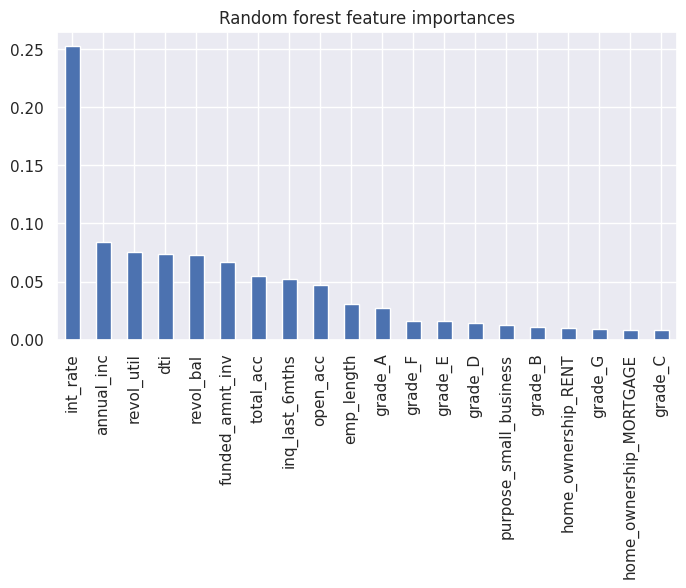

In [38]:
_, ax = plt.subplots(figsize=(8,4))
imps_rf = rf_grid_cv.best_estimator_.feature_importances_
rf_feat_imps = pd.Series(imps_rf, index=X.columns).sort_values(ascending=False)
rf_feat_imps.head(20).plot(kind='bar')
plt.title("Random forest feature importances")

From GridSearch, max_depth=10, n_estimators=200 are the best estimators. The random forest is able to predict 95% of good loans are good loans. As expected, interest rate and annual income are the top two features importances to driving the model predictions.  This model tends to handle highly correlated features well, whereas the logistic regression model would not. 

### Gradient Boosting Model

In [39]:
# tunning parameters
grid_params={
    'learning_rate': [0.05, 0.1, 0.5,1],
    'n_estimators':np.arange(100,200,500)
    }
gb_grid_cv=GridSearchCV(GradientBoostingClassifier(),param_grid=grid_params,cv=3)
gb_grid_cv.fit(X_sample, y_sample)
print(gb_grid_cv.best_score_)
print(gb_grid_cv.best_estimator_)

0.9454125002954451
GradientBoostingClassifier(learning_rate=0.05)


In [40]:
# predict and print score for train and test datasets
y_train_predict_gb=gb_grid_cv.best_estimator_.predict(X_train)
y_test_predict_gb=gb_grid_cv.best_estimator_.predict(X_test)

print("\nTrain data scores")
print(classification_report(y_train,y_train_predict_gb))
print("\n\nTest data scpres")
print(classification_report(y_test,y_test_predict_gb))



Train data scores
              precision    recall  f1-score   support

           0       0.67      0.00      0.00     34803
           1       0.95      1.00      0.97    607173

    accuracy                           0.95    641976
   macro avg       0.81      0.50      0.49    641976
weighted avg       0.93      0.95      0.92    641976



Test data scpres
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     11664
           1       0.95      1.00      0.97    202329

    accuracy                           0.95    213993
   macro avg       0.47      0.50      0.49    213993
weighted avg       0.89      0.95      0.92    213993



Gradient boosting AUC:  0.75


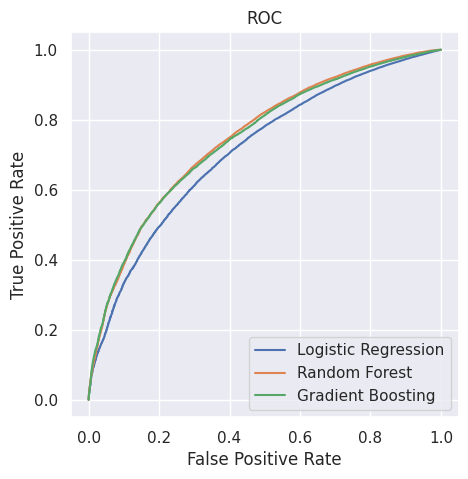

In [41]:
# find AUC 
y_test_pred_gb_proba=gb_grid_cv.best_estimator_.predict_proba(X_test)[::,1]
fpr_gb, tpr_gb,_=metrics.roc_curve(y_test,y_test_pred_gb_proba)
auc_gb=metrics.roc_auc_score(y_test,y_test_pred_gb_proba)
print("Gradient boosting AUC: ",round(auc_gb,2))

#create ROC curve
f,(ax1)=plt.subplots(1,sharex=True,sharey=True,figsize=(5,5))
ax1.plot(fpr_lr,tpr_lr,label="Logistic Regression")
ax1.legend(loc="lower right")
ax1.plot(fpr_rf,tpr_rf,label="Random Forest")
ax1.legend(loc="lower right")
ax1.plot(fpr_gb,tpr_gb,label="Gradient Boosting")
ax1.legend(loc="lower right")
plt.ylabel('True Positive Rate')
plt.xlabel("False Positive Rate")
plt.title("ROC")
plt.show()

ROC curve typically feature TPR on Y axis and FPR on X axis to show the trade-off between them. Models that give curves closer to the top left corner is the ideal, larger under the curve ( AUC). Notice that random forest and gradient boosting have a AUC of 0.75 and is better than logistic regression.

Text(0.5, 1.0, 'Gradient boosting feature importances')

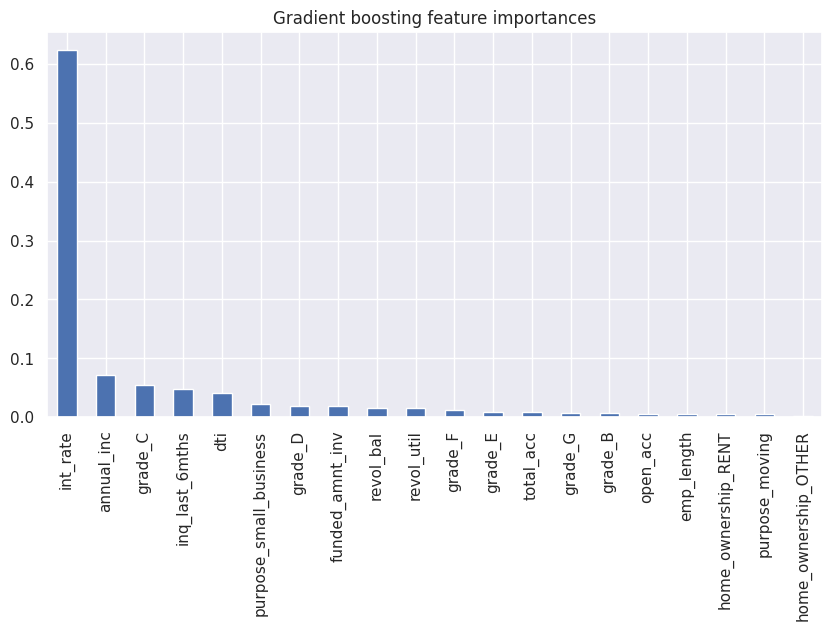

In [42]:
_, ax = plt.subplots(figsize=(10,5))
imps_gb = gb_grid_cv.best_estimator_.feature_importances_
gb_feat_imps = pd.Series(imps_gb, index=X.columns).sort_values(ascending=False)
gb_feat_imps.head(20).plot(kind='bar')
plt.title("Gradient boosting feature importances")

The important features of all models seem to agree with what we saw during EDA section which showed the interest rate is the most important feature that has a strong positive correlation to defaults, the lower the loan grade the higher the interest rate and higher default rate. I seem to prefer Random forest and gradient boosting more as they can pick up the annual income, purpose loans, and inquiry among top features that shows they handle highly correlated features well, whereas the logistic regression would not.From GridSearch, learning_rate=0.05 is the best estimator. Gradient boosting has a very similar performance to random forest.  

# Model Selection

In [43]:
auc_gb=metrics.roc_auc_score(y_test,y_test_pred_gb_proba)
print("AUC of Logistic Regression: ",round(auc_lr,2))
print("AUC of Random Forest:       ",round(auc_rf,2))
print("AUC of Gradient Boosting:   ",round(auc_gb,2))

AUC of Logistic Regression:  0.71
AUC of Random Forest:        0.75
AUC of Gradient Boosting:    0.75


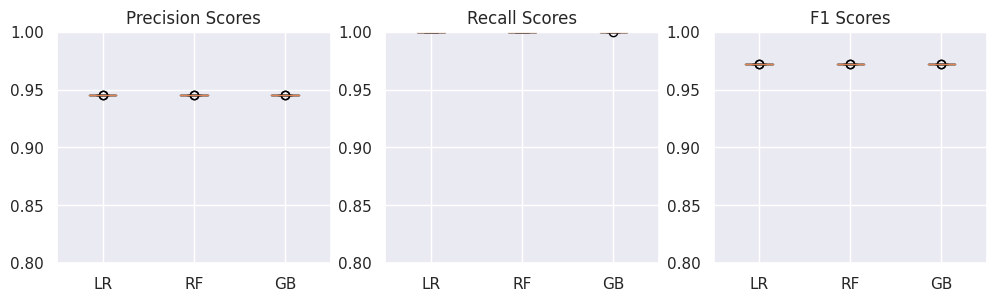

In [44]:
grid_cv_list=[lr_grid_cv,rf_grid_cv,gb_grid_cv]
results_precision=[]
results_recall=[]
results_f1=[]

for grid_cv in grid_cv_list:
    scores= cross_validate(grid_cv.best_estimator_,X_test, y_test, cv=5, scoring=['precision','recall','f1'])
    results_precision.append(scores['test_precision'])
    results_recall.append(scores['test_recall'])
    results_f1.append(scores['test_f1'])
    
models=['LR',"RF","GB"]
_, ax = plt.subplots(1,3,figsize=(12,3))
ax[0].boxplot(results_precision,labels=models)
ax[0].set_title("Precision Scores")
ax[0].set_ylim(0.8,1)
ax[1].boxplot(results_recall,labels=models)
ax[1].set_title("Recall Scores")
ax[1].set_ylim(0.8,1)
ax[2].boxplot(results_f1,labels=models)
ax[2].set_title("F1 Scores")
ax[2].set_ylim(0.8,1)
plt.show()


Since, the data set is imbalanced, more good loans than bad loans, Precision and recall are essential metrics to use in our case. As shown in the plots below, all 3 models have similar performance. Precision score of 0.87 means 13% of bad loans were incorrectly classified as good loans which is not good. Investor will lose their money for these loans. A recall score of 1means there was no good loans classified as bad loans. Unfortunately, recall of 1 is not enough to minimize the default risks. F1 is the measurement of accuracy which combined the precision and recall scores that is why F1 is right in the middle of precision and recall cores. 

I am not happy with the result but there is one more parameter that we can evaluate later on to find the good trade-off between precision and recall. Remember our goal is high precision as close to 1 as possible. Since, the data set is imbalanced, more good loan than bad loan, precision and recall are essential metric but all there models have very similar precision and AUC scores across validation. What we are looking for is a model that give us the best precision. To do this we will evaluate all models across threshold values from 01. to 1. 



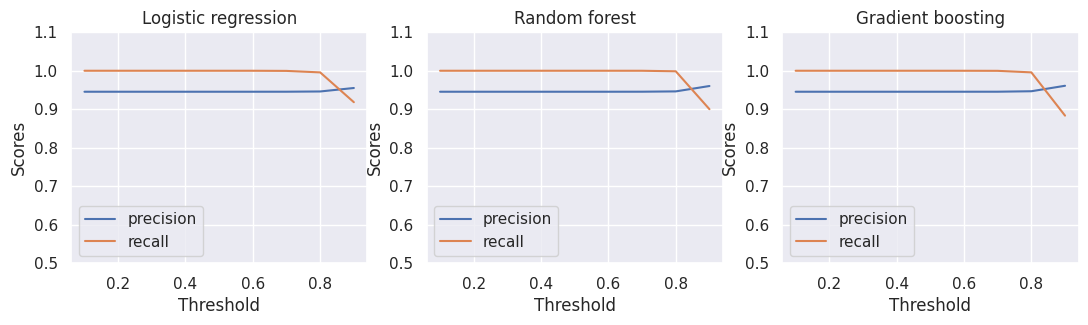

In [45]:
# assing threshold, precision, and recall list for each model
threshold_list = np.arange(0.1, 1, 0.1).tolist()
precision_lr=[]
recall_lr=[]
precision_rf=[]
recall_rf=[]
precision_gb=[]
recall_gb=[]

for i in threshold_list:
    # logistic regression vs. threshold
    y_pred_new_threshold_lr = (lr_grid_cv.best_estimator_.predict_proba(X_test)[:, 1] >= i).astype(int)
    precision_lr.append(precision_score(y_test, y_pred_new_threshold_lr))
    recall_lr.append(recall_score(y_test, y_pred_new_threshold_lr))
    
    # logistic regression vs. threshold
    y_pred_new_threshold_rf = (rf_grid_cv.best_estimator_.predict_proba(X_test)[:, 1] >= i).astype(int)
    precision_rf.append(precision_score(y_test, y_pred_new_threshold_rf))
    recall_rf.append(recall_score(y_test, y_pred_new_threshold_rf))
    
    # logistic regression vs. threshold
    y_pred_new_threshold_gb = (gb_grid_cv.best_estimator_.predict_proba(X_test)[:, 1] >= i).astype(int)
    precision_gb.append(precision_score(y_test, y_pred_new_threshold_gb))
    recall_gb.append(recall_score(y_test, y_pred_new_threshold_gb))

    
# create precision, revall vs. threshold
f,ax=plt.subplots(1,3,figsize=(13,3))
precision_list=[precision_lr,precision_rf,precision_gb]
recall_list=[recall_lr,recall_rf,recall_gb]
title=['Logistic regression','Random forest','Gradient boosting']

for i in range(3):
    ax[i].plot(threshold_list,precision_list[i],label="precision")
    ax[i].legend(loc="lower left")
    ax[i].plot(threshold_list,recall_list[i],label="recall")
    ax[i].legend(loc="lower left")
    ax[i].set_ylabel('Scores')
    ax[i].set_xlabel("Threshold")
    ax[i].set_ylim(0.5,1.1)
    ax[i].set_title(title[i])

plt.show()


In [46]:
y_pred_lr_threshold_0p95 = (lr_grid_cv.best_estimator_.predict_proba(X_test)[:, 1] >= 0.97).astype(int)
print("\nLogistic regression precision with 0.95 threshold: ",round(precision_score(y_test, y_pred_lr_threshold_0p95),3))
print("Logistic regression recall with 0.95 threshold: ",round(recall_score(y_test, y_pred_lr_threshold_0p95),3))

y_pred_rf_threshold_0p95 = (rf_grid_cv.best_estimator_.predict_proba(X_test)[:, 1] >= 0.97).astype(int)
print("\nRandom forest precision with 0.95 threshold: ",round(precision_score(y_test, y_pred_rf_threshold_0p95),3))
print("Random forest recall with 0.95 threshold: ",round(recall_score(y_test, y_pred_rf_threshold_0p95),3))

y_pred_gb_threshold_0p95 = (gb_grid_cv.best_estimator_.predict_proba(X_test)[:, 1] >= 0.97).astype(int)
print("\nGradient boosting precision of threshold 0.95: ",round(precision_score(y_test, y_pred_gb_threshold_0p95),3))
print("Gradient boosting recall of threshold 0.95: ",round(recall_score(y_test, y_pred_gb_threshold_0p95),3))


Logistic regression precision with 0.95 threshold:  0.985
Logistic regression recall with 0.95 threshold:  0.249

Random forest precision with 0.95 threshold:  0.989
Random forest recall with 0.95 threshold:  0.283

Gradient boosting precision of threshold 0.95:  0.986
Gradient boosting recall of threshold 0.95:  0.356


For our solving problem, higher precision is more important as we want as many good loans predicted as good loans but higher recall is also wanted to avoid good loans incorrectly classified as bad loans. The more good loans accepted the more returns for investors. At the threshold of 0.95, gradient boosting just give us the best trade-off we are looking for between precision and recall. 0.986 and 0.353 respectively.

# Model conclusion
All three models have very similar performance on precision, recall, and AUC scores through cross validation. The important features of all models seem to agree with what we saw during EDA section that interest rate and loan grades have the strongest correlation to defaults. To further nail down a best model, I trained the models with thresholds vary from 0.1 to 1 to find a good trade-off between precision and recall. For loan business, precision score is more important than recall as higher precision higher prediction rate for good loans. At the threshold of 0.95, gradient boosting just give us the best precision and recall, 0.986 and 0.353 respectively. You can argue recall is not so good, but recall is not critical because when loans are incorrectly classified as default it will only impact loan acceptance rate which leads to lower returns. Investors would be happier with slightly lower return than losing money for defaults.     





# Future improvement
What loans are safe for investors? Loan grades E, F, and G have the highest default rates, with the least funded amount. I calculated profits for each of them and could not find the reward for higher risks. Loan grades A, B, C, and D are safer. Also, I would recommend investors stay away from education and small business loan purposes as they are the top two in the default list.


As show during EDA, recoveries feature showed a solid correlation to defaults. Recoveries are writes off debt when the borrower has become delinquent on payments. We are in the middle of a challenging macroeconomic environment characterized by the highest inflation and the highest interest rate in 22 years. A weak economy increases default risks. Now is a perfect time to revisit the most important feature recoveries, refresh strategies, and establish more efficient fraud detection.

